<a href="https://colab.research.google.com/github/Areliortiz/SIMULACION2/blob/main/Metropolis_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Metropolis-Hastings 1D**

In [106]:
import numpy as np
import matplotlib.pyplot as plt

1.   Exponencial
2.   Weibull
3.   Cauchy

# *1. Distribución exponencial*
Aproximaremos la distribución exponencial con el método de metropolis.

Funcion de densidad: $f(x) = λe^{-λx}$

Parametro $λ>0$

In [107]:
#funcion de densidad
def exp(x,lamda):
  return lamda*np.exp(-lamda*x)

In [108]:
#parametros de la función
lamda = 0.5
delta=0.1  # Entre mas grande sea delta la aceptación es menor


In [109]:
n_exponencial = 50000  # Número de iteraciones
x_1 = np.zeros(n_exponencial)  # Vector para los valores generados
x_1[0] = 2
acept_1 = 0

# Algoritmo Metropolis-Hastings
for i in range(0, n_exponencial - 1):
    y_1 = x_1[i] + np.random.uniform(-delta, delta)  # suma x_[i] + un valor aletorio entre (-0.1,0.1)

    # Corrected: Now using the corrected exp function
    if np.random.rand() < min(1, exp(y_1, lamda) / exp(x_1[i], lamda)):  # Condicion de metropolis hastings
        x_1[i + 1] = y_1
        acept_1 += 1

print("La aceptación fue del", acept_1/n_exponencial*100, "%")


La aceptación fue del 98.79400000000001 %


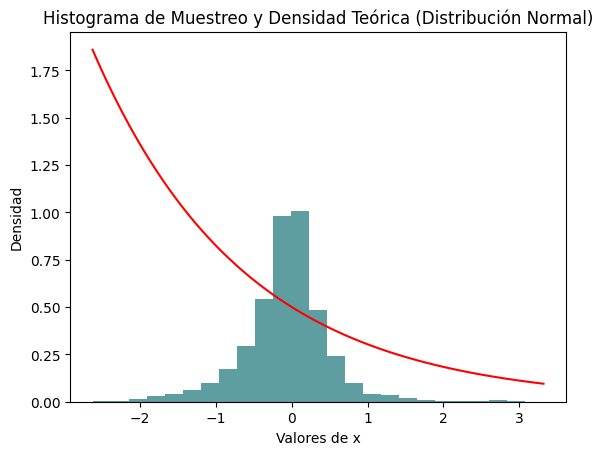

In [110]:
plt.hist(x_1,density=True,color='cadetblue',bins=25)
xs=np.linspace(min(x_1),max(x_1),100)   # Defiminos los límites de nuestra gráfica
plt.plot(xs,exp(xs,lamda),color='red')
plt.xlabel('Valores de x')
plt.ylabel('Densidad')
plt.title('Histograma de Muestreo y Densidad Teórica (Distribución Normal)')
plt.show()

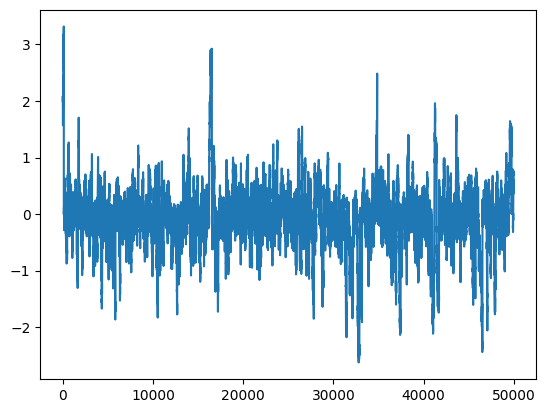

In [111]:
plt.plot(x_1)

> ***Media y Varianza***

Media(μ):	$\frac{1}{λ}$

Varianza $(σ^2)$ :	$\frac{1}{λ^2}$

Desviacion estandar(σ):$\sqrt{σ^2} \\ $

Como λ = 0.5, entonces:

Media(μ)= $\frac{1}{0.5}$=2

Varianza $(σ^2)$ :	$\frac{1}{0.5^2} = 4$

Desviacion estandar(σ):$\sqrt{4} = 2$





# *2. Distribución Weibull*
Aproximaremos la distribución exponencial con el método de metropolis.

Funcion de densidad: $ f(x,λ,α)=λα(λx)^{α−1}$ $e^{-(λx)^α}$

Parametros:


*   $λ>0$
*   $α>0$




In [112]:
#funcion de densidad
def weibull(x,lamda,alpha):
  return np.where(x >= 0, lamda*np.exp(-lamda*x), 0)

Media: -0.08
Varianza: 0.32
Desviación: 0.57


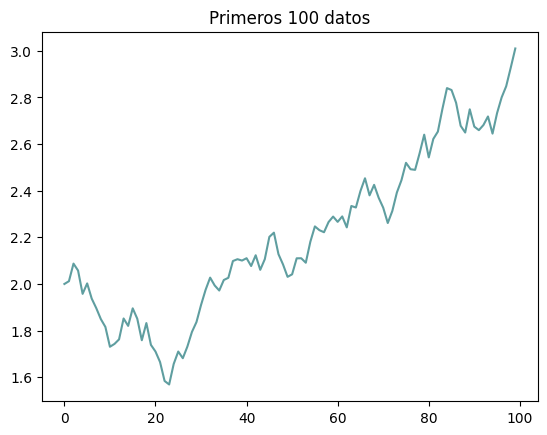

In [113]:
# Media y varianza
media = np.mean(x_1)
varianza = np.var(x_1)
desv = np.std(x_1)
print(f"Media: {media:.2f}")
print(f"Varianza: {varianza:.2f}")
print(f"Desviación: {desv:.2f}")

# Observamos el comportamiento que tienen nuestra muestra generada
plt.plot(x_1[0:100],color='cadetblue') # Primeros 100 datos
plt.title('Primeros 100 datos')
plt.show()

Ejercicio con distribucion de Cauchy

In [114]:
def f(x,gamma,x0):
  return 1/((np.pi*gamma)*(1+((x-x0)/gamma)**2))

In [115]:
# Parametros que cambian
x0 = 0.2
gamma = 0.1

In [116]:
delta = 0.5

In [117]:
n = 50000  # n tiene que ser muy grande
x = np.zeros(n)
x[0] = 0  # Valor inicial
acept = 0

for i in range(0,n-1):
  y = x[i] + np.random.uniform(-delta,delta)
  if np.random.rand()<min(1,f(y,gamma,x0)/f(x[i],gamma,x0)):
    x[i+1]=y
    acept += 1
  else:
    x[i+1] = x[i]
print("La aceptacion fue del", acept/n*100,"%")

La aceptacion fue del 48.192 %


Text(0.5, 1.0, 'Distribución de Cauchy')

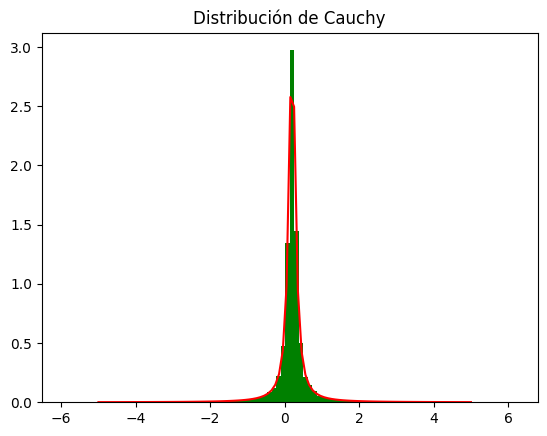

In [118]:
plt.hist(x,density = True, bins=100, color='green')
xs = np.linspace(-5,5,100)
plt.plot(xs,f(xs,gamma,x0), color='red')
plt.title('Distribución de Cauchy')

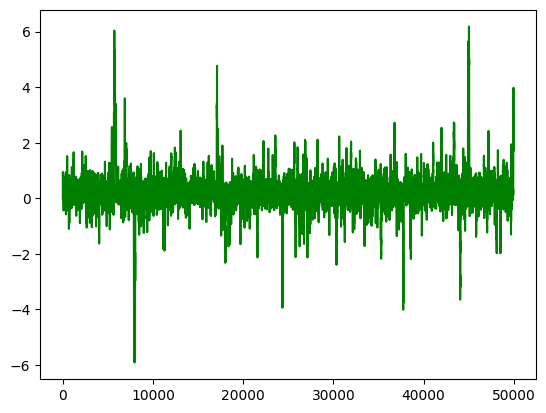

In [119]:
plt.plot(x, color='green')

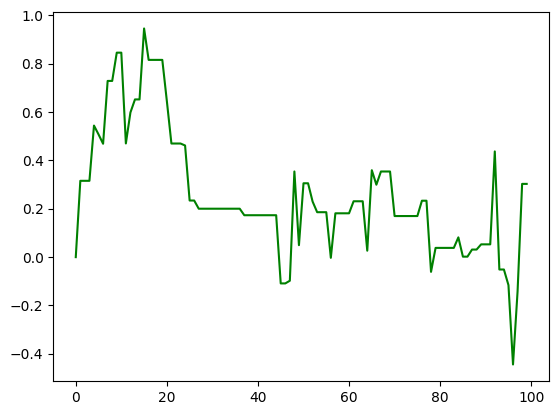

In [120]:
plt.plot(x[:100], color='green')

In [121]:
u=[1,2,3,4,5,6,7,8,9,10]
a=np.var(u)
k=np.std(u)
print(a,k)
r=8.25**-0.5
print(r)

8.25 2.8722813232690143
0.3481553119113957
